In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Memuat dan membagi dataset MNIST menjadi data latih dan uji
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [3]:
# One-hot encoding untuk label
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
# Membuat model CNN lebih kompleks
model = models.Sequential()

In [5]:
# Layer Convolutional 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

In [6]:
# Layer Convolutional 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
# Layer Convolutional 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

In [8]:
# Flatten layer untuk mengubah output menjadi vektor 1D
model.add(layers.Flatten())

In [9]:
# Dense layers untuk klasifikasi
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer untuk menghindari overfitting
model.add(layers.Dense(10, activation='softmax'))

In [10]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Melatih model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 20s 24ms/step - loss: 0.2644 - accuracy: 0.9173 - val_loss: 0.0552 - val_accuracy: 0.9847
Epoch 2/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0727 - accuracy: 0.9793 - val_loss: 0.0458 - val_accuracy: 0.9864
Epoch 3/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0417 - val_accuracy: 0.9882
Epoch 4/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0398 - accuracy: 0.9876 - val_loss: 0.0369 - val_accuracy: 0.9895
Epoch 5/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0316 - accuracy: 0.9911 - val_loss: 0.0339 - val_accuracy: 0.9896


In [12]:
# Evaluasi model pada dataset uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 0.0254 - accuracy: 0.9922
Test accuracy: 0.9922000169754028


Epoch 1/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0364 - val_accuracy: 0.9907
Epoch 2/5
750/750 [==============================] - 18s 25ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0394 - val_accuracy: 0.9898
Epoch 3/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.0389 - val_accuracy: 0.9907
Epoch 4/5
750/750 [==============================] - 18s 24ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0317 - val_accuracy: 0.9920
Epoch 5/5
750/750 [==============================] - 19s 25ms/step - loss: 0.0158 - accuracy: 0.9947 - val_loss: 0.0438 - val_accuracy: 0.9900


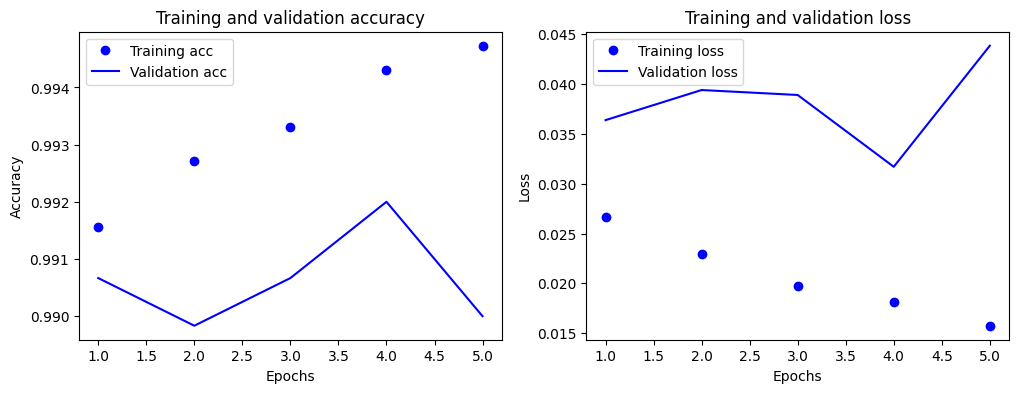

In [13]:
import matplotlib.pyplot as plt

# Melatih model dengan menyimpan riwayat pelatihan
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Menampilkan grafik akurasi pelatihan dan validasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot akurasi pelatihan dan validasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Tampilkan grafik
plt.show()